# ANALISIS EXPLORATORIO DATOS - RESUMEN HERRAMIENTAS

**RESUMEN AED**


1.   CARGA DE DATOS Y LIBRERIAS 
Leemos archivo .csv o .xlxs -> alojamos en variable y hacemos una copia siempre usando copy()

2.   ESTADO DE SALUD DEL DF 
Usamos las siguientes funciones:
*   libreria 'funpymodeling' -> status()
*   libreria qgrid -> show_grid()
*   libreria google.colab.data_table -> DataTable






3.  EXPLORAR VARIABLES NUMERICAS 
*   profiling_num() -> obtenemos resumen estadisticos de las variables numericas
*   .describe() -> obtenemos resumen estadisticos de las variables numericas, incluyendo max y min
*  .hist() -> graficamos histogramas de todas o parte de las var numericas



4. EXPLORACION DE VAR CATEGORICAS
*   sns.countplot() -> analisis visual mediante graficos de barra. Recordar: con order= ordenamos y modificando las opcoines generales de matplotlib solucionamos el overlaping
*  freq_tbl() -> analisis cuantitativo. Obtenemos un df con analisis de frecuencia, porcentaje contribucion y porcentaje contribucion acumulado. 





5. PANDAS PROFILING 
Utilizamos la función ProfileReport(). Con ella obtenemos un informe muy completo del dataset.

*   en la parte superior -> overview, production y warning
*   con respecto a las variables -> tipo, cardinalidad, hist o barras, mising values, zeros, etc.
*   importante que el parámeto minimal sea igual a True; ej: ProfileReport(data01, minimal=True)



6. CALCULO DE RATIOS -> Utiles para obtener mas información del dataset
data01['ratio_sal_antig']=data01['salario']/data01['antiguedad']

7. ANALISIS ESTADISICO BIVARIADO

7.1 Categorica vs Categorica
*   Tratamos de responder cuestionameintos tales como -> ¿Cual es la relación entre 'recibis algun tipo de bonus' y el 'tipo de contrato' (Es decir dos variables categoricas) 
*   Utilizamos funcion pd.crosstab(data01['recibis algun tipo de bonus'],data01['tipo de contrato']) -> obtenemos, para cada categoria de la primer variable , cuántos registros pertenecen a cada categoria de la segunda variable.
*   Con los parametros 'margins' y 'normalize' podemos incorporar columnas de totales y expresar valores porcentajes (totales o por registro)
*   Es importante evitar los sesgos de representatividad (ratios muy altos o muy bajos es probable que tengan pocos casos u observaciones)
*   Grafica Faceting -> g = sns.catplot(x='recibis algun tipo de bonus',col='tipo de contrato', data = data01, kind='count')
*   Este último gráfico es conveniente acompañarlo de una tabla explicativa para evitar confusiones relativas a las proporciones de las barras. 

7.2 Numérica vs Categórica
*   Respondemos preguntas tales como ->¿Cambia el salario de acuerdo al tipo de contrato?
*   .groupby() -> agrupamos por var categorica de interes (tipo de contrato) luego 'seleccionamos' la var numérica ('salario') mediante [] y finalmente aplicamos operacion (mean()). Con esto obtenemos df ordenado descendentemente por el promedio de salarios para cada categoria. 
*   Ejemplo: data0.groupby('tipo_de_contrato')['salario'].mean().sort_values(ascending=False) # arroja 
*   Por otro lado tambien podemos concatenar otras funciones, como .describe(), que nos permite obtener otros indicadores y asi realizar un analisis más detallado.
*   Ejemplo:  data0.groupby('tipo_de_contrato')['salario'].describe()
*   Alternativamente podemos obviar la variable numerica pasando solamente la var. categorica -> con ello aplicamos la operación a todas las var. num. del dataset. -> ej: data0.groupby('tipo_de_contrato').mean()
Observando los datos obtenidos en este ulitmo caso ¿ podemos afirmar que una de las variables es más importante que las otras?
*   Grafica boxplot() -> sns.boxplot(y='Age', x='Purpose',data=data01)
*   Recordar que en el grafico de boxplot observamos P75, P50  y P25 es decir cuartiles 1°,2° y 3° respectivamente.
*   Extensión superior U -> máximo dato NO outlier
*   Extensión inferior L -> mínimo dato NO ouliers
*   Corte superior -> P75 + 1.5RI y corte inferior -> P25-1.5RI

*   Gráfica de Violin -> sns.violinplot(y='Age', x='Purpose',data=data01). Nos brinda una informacion similar pero en un grafico suavizado. 
*   Interesante visualizar la relación entre boxplot, violin e histograma.

7.3 Numerica vs Numerica
*   Enfoque 1 -> discretizamos una de las variables => vamos a un esquema de num. vs cat. COMPLETAR 
*   Enfoque 2 -> discretizamso las dos variables => cat vs. cat
*   Grafica .pairplot() -> si le pasamos el dataset completo nos arroja un conjunto de graficas de a pares que para el caso particular de num vs num obtenemos un scatterplot. 
*  Los graficos que cruzan dos variables, de las cuales una a pesar de ser num tiene pocas categorias (columnas de puntos), NO nos sirven mucho mejor usar en esos casos un boxplot. 




In [ ]:
%%capture
!pip install funpymodeling 

In [ ]:
%%capture
!pip install pandas-profiling==2.7.1

In [ ]:
from google.colab.data_table import DataTable

In [ ]:
import pandas as pd


In [ ]:
from funpymodeling.exploratory import status, profiling_num, freq_tbl

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1. CARGA DE DATOS 





In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data/encuesta_clean_202102 - Hoja 1.csv', sep=',')

2. ESTADO DE SALUD DEL DATAFRAME

In [ ]:
data01 = data.copy()

In [ ]:
data01 = data01.drop(columns='salario_mensual_o_retiro_neto_en_tu_moneda_local')

In [ ]:
status(data01.iloc[:,0:11])

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,timestamp,0,0.000000,0,0.0,5799,object
1,estoy_trabajando_en,0,0.000000,0,0.0,1,object
2,donde_estas_trabajando,0,0.000000,0,0.0,24,object
3,tipo_de_contrato,0,0.000000,0,0.0,6,object
4,salario_mensual_o_retiro_bruto_en_tu_moneda_local,0,0.000000,0,0.0,1324,float64
5,pagos_en_dolares,4762,0.810415,0,0.0,7,object
6,cual_fue_el_ultimo_valor_de_dolar_que_tomaron,5032,0.856365,0,0.0,213,object
7,que_tan_conforme_estas_con_tu_sueldo,0,0.000000,0,0.0,4,int64
8,como_crees_que_esta_tu_sueldo_con_respecto_al_...,0,0.000000,0,0.0,4,int64
9,recibis_algun_tipo_de_bono,0,0.000000,0,0.0,5,object


In [ ]:
DataTable(data01.iloc[:,5:9])

,pagos_en_dolares,cual_fue_el_ultimo_valor_de_dolar_que_tomaron,que_tan_conforme_estas_con_tu_sueldo,como_crees_que_esta_tu_sueldo_con_respecto_al_ultimo_semestre
0,NaN,NaN,2,2
1,NaN,NaN,2,2
2,Cobro en dólares,165,3,3
3,Cobro en dólares,NaN,4,4
4,NaN,NaN,3,3
...,...,...,...,...
5871,NaN,NaN,2,3
5872,NaN,NaN,2,2
5873,NaN,NaN,2,1
5874,NaN,NaN,3,3


3. VARIABLES NUMERICAS
Con profiling_num() y describe()-> identificamos variables numericas


In [ ]:
profiling_num(data01)

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,salario_mensual_o_retiro_bruto_en_tu_moneda_local,194581.030274,132370.839382,0.680286,33000.00,58596.8275,105000.0,160000.0,240000.0,490000.00,700000.0
1,que_tan_conforme_estas_con_tu_sueldo,2.731110,0.812786,0.297603,1.00,1.0000,2.0,3.0,3.0,4.00,4.0
2,como_crees_que_esta_tu_sueldo_con_respecto_al_...,2.658952,0.888943,0.334321,1.00,1.0000,2.0,3.0,3.0,4.00,4.0
3,de_que_fue_el_ajuste_total,23.756127,140.134471,5.898877,0.00,0.0000,0.0,15.0,28.0,50.00,100.0
4,en_que_mes_fue_el_ultimo_ajuste,3.887338,2.774394,0.713700,0.00,0.0000,0.0,4.0,7.0,7.00,8.0
5,anos_de_experiencia,8.064670,9.537540,1.182632,0.00,0.0000,2.0,6.0,12.0,21.25,30.0
6,anos_en_la_empresa_actual,3.619129,27.518689,7.603678,0.00,0.0000,0.0,1.0,4.0,15.00,23.0
7,anos_en_el_puesto_actual,2.777229,4.159325,1.497653,0.00,0.0000,0.0,2.0,3.0,10.00,17.0
8,gente_a_cargo,1.924609,7.760189,4.032087,0.00,0.0000,0.0,0.0,1.0,10.00,30.0
9,la_recomendas_como_un_buen_lugar_para_trabajar,7.588666,1.864919,0.245751,2.00,4.0000,7.0,8.0,9.0,10.00,10.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdba6ac0890>,
      dtype=object)

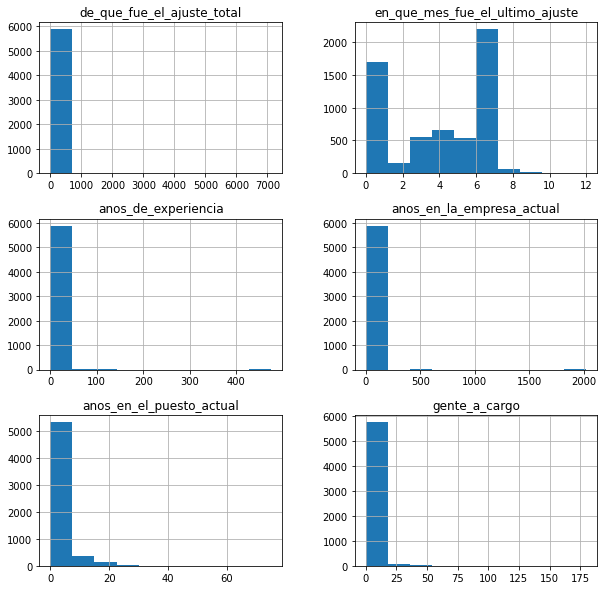

In [ ]:
data01.iloc[:,11:20].hist(figsize=(10,10))


In [ ]:
data01.describe().T

,count,mean,std,min,25%,50%,75%,max
salario_mensual_o_retiro_bruto_en_tu_moneda_local,5876.0,194581.030274,132370.839382,14400.0,105000.0,160000.0,240000.0,774000.0
que_tan_conforme_estas_con_tu_sueldo,5876.0,2.731110,0.812786,1.0,2.0,3.0,3.0,4.0
como_crees_que_esta_tu_sueldo_con_respecto_al_ultimo_semestre,5876.0,2.658952,0.888943,1.0,2.0,3.0,3.0,4.0
de_que_fue_el_ajuste_total,5876.0,23.756127,140.134471,0.0,0.0,15.0,28.0,7112.0
en_que_mes_fue_el_ultimo_ajuste,5876.0,3.887338,2.774394,0.0,0.0,4.0,7.0,12.0
anos_de_experiencia,5876.0,8.064670,9.537540,0.0,2.0,6.0,12.0,475.0
anos_en_la_empresa_actual,5876.0,3.619129,27.518689,0.0,0.0,1.0,4.0,2021.0
anos_en_el_puesto_actual,5876.0,2.777229,4.159325,0.0,0.0,2.0,3.0,75.0
gente_a_cargo,5876.0,1.924609,7.760189,0.0,0.0,0.0,1.0,180.0
la_recomendas_como_un_buen_lugar_para_trabajar,5876.0,7.588666,1.864919,1.0,7.0,8.0,9.0,10.0


4. VARIABLES CATEGORICAS
Utilizamos la libreria seaborn (on top en Matpotlib) para realizar un grafico de barras de las distintas variables categoricas. 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


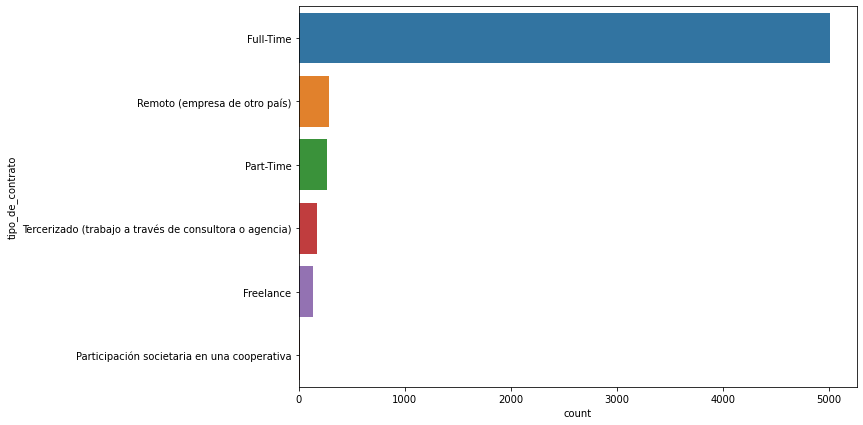

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(y=data01['tipo_de_contrato'], order=data01['tipo_de_contrato'].value_counts().index)
plt.show()

ANALISIS CUANTITATIVO DE VARIABLES CATEGORICAS

In [ ]:
t_trabajo = freq_tbl(data01['trabajo_de'])
t_trabajo.query('frequency>=50')

,trabajo_de,frequency,percentage,cumulative_perc
0,Developer,2448,0.416610,0.416610
1,SysAdmin / DevOps / SRE,627,0.106705,0.523315
2,Technical Leader,353,0.060075,0.583390
3,QA / Tester,257,0.043737,0.627127
4,Manager / Director,246,0.041865,0.668993
5,Project Manager,191,0.032505,0.701498
6,BI Analyst / Data Analyst,158,0.026889,0.728387
7,HelpDesk,146,0.024847,0.753233
8,Architect,128,0.021784,0.775017
9,Consultant,104,0.017699,0.792716


In [ ]:
t_trabajo.query('frequency>=50')['trabajo_de']

0                     Developer
1       SysAdmin / DevOps / SRE
2              Technical Leader
3                   QA / Tester
4            Manager / Director
5               Project Manager
6     BI Analyst / Data Analyst
7                      HelpDesk
8                     Architect
9                    Consultant
10             Business Analyst
11                Data Engineer
12                   Networking
13               Data Scientist
14                      Infosec
15                           UX
16              Product Manager
17               Recruiter / HR
Name: trabajo_de, dtype: object

5. PANDAS PROFILING --> posee funcion ProfileReport que emite informe muy completo sobre las caracteristicas de las varibales que componen el dataset analizado


In [ ]:
from pandas_profiling import ProfileReport
ProfileReport(data01, minimal=True)

Summarize dataset:   0%|          | 0/76 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

6. CALCULAMOS ALGUNOS RATIOS --> nos sirven para ganar más informacion de nuestro dataset.
